## t-SNE
t-SNE (t-Distributed Stochastic Neighbor Embedding) es una técnica **no lineal** de reducción de dimensionalidad y visualización.

Su objetivo es representar datos de alta dimensión en un espacio de baja dimensión (normalmente 2D o 3D) preservando las relaciones locales entre los puntos. Es decir, los puntos que son cercanos en el espacio original permanecen cercanos en la proyección.

Imagina que tienes puntos en un espacio de muchas dimensiones (por ejemplo, cada punto corresponde una imagen de 784 píxeles). Queremos visualizarlos en 2D o 3D para ver patrones o agrupaciones.

**Problema**: En espacios de alta dimensión, las distancias euclídeas pierden sentido (todos los puntos parecen estar casi igual de lejos).

t-SNE intenta resolver eso de forma probabilística.

> **t-SNE no intenta preservar distancias globales, sino las probabilidades de vecindad.**

### Idea intuitiva
1. Mide proximidad entre puntos originales. Cada punto “elige” una especie de lista de sus vecinos más probables. Cuanto más cerca está otro punto, más alta es esa probabilidad.

2. Toma una representación en 2D aleatoria. Todos los puntos se colocan al azar en el plano.

3. Ajusta las posiciones iterativamente. Si dos puntos eran vecinos en el espacio original, el algoritmo los atrae. Si no eran vecinos, los empuja.

La fuerza de atracción/empuje está definida de modo que el mapa en 2D mantenga las mismas relaciones de vecindad que el espacio original.

### Algoritmo
El algoritmo opera en dos fases:

1. **Cálculo de similitud**: t-SNE construye una distribución de probabilidad en el espacio de alta dimensión. Para cada par de puntos, asigna una probabilidad que representa su similitud o probabilidad de ser vecinos. Los puntos lejanos tienen menor probabilidad de ser escogidos como vecinos por un punto.

    - Se define la **probabilidad** condicional que un punto **$\mathbf{x_i}$** sea vecino de otro punto **$\mathbf{x_j}$**.

    - Ésta se usa para definir la similitud **$p_{ij}$** entre **$x_i$** y **$x_j$**.

2. **Minimización de la divergencia**: En el espacio de menor dimensión, se crea una distribución de probabilidad similar. El algoritmo utiliza la optimización por descenso de gradiente para minimizar la divergencia de Kullback-Leibler, una función de coste que mide la diferencia entre las dos distribuciones de probabilidad. El resultado es un mapa de baja dimensión que refleja las similitudes originales.

- Se toma una proyección de los puntos, $y_i$ e $y_j$ respectivamente.

- Se define la **similitud** $q_{ij}$ entre $y_i$ e $y_j$ de manera análoga.

- t-SNE busca que las dos distribuciones {$p_{ij}$} y {$q_{ij}$} sean lo más parecidas posible, minimizando la divergencia de Kullback-Leibler (KL):

$$
KL(P|| Q) = \sum_{i \neq j}  p_{ij} \log \dfrac{ p_{ij}}{ q_{ij}}
$$

Esto se optimiza mediante descenso del gradiente sobre las posiciones $y_i$.

## Implementación
Vamos a aplicar t-SNE a un dataset fundamental en alrendizaje automático, de dígitos manuscritos. Este dataset tiene:

- 1797 imágenes de dígitos 0−9
- Cada imagen está representada por 64 píxeles (8×8).

Vamos a reducir esas 64 dimensiones a 2D con t-SNE para visualizar cómo el algoritmo agrupa los dígitos parecidos.

Primero cargamos y visualizamos los datos.

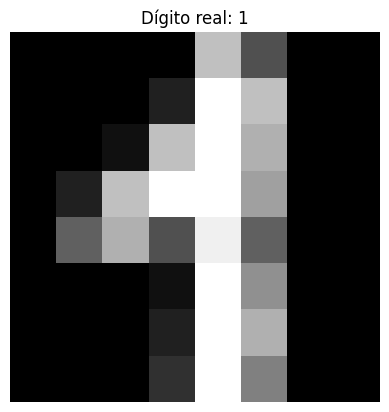

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset de dígitos
digits = load_digits()

index = 42
image = digits.images[index]   # matriz 8x8
label = digits.target[index]   # etiqueta real

plt.imshow(image, cmap='gray', interpolation='nearest')
plt.title(f"Dígito real: {label}")
plt.axis('off')
plt.show()

A coninuación visualizamos los datos, aplicando antes PCA: representanmos los dos primeros atributos y coloreamos según la clase.

- Cada punto = una imagen de un dígito (en 64D originalmente).
- Colores distintos = clases (0–9).

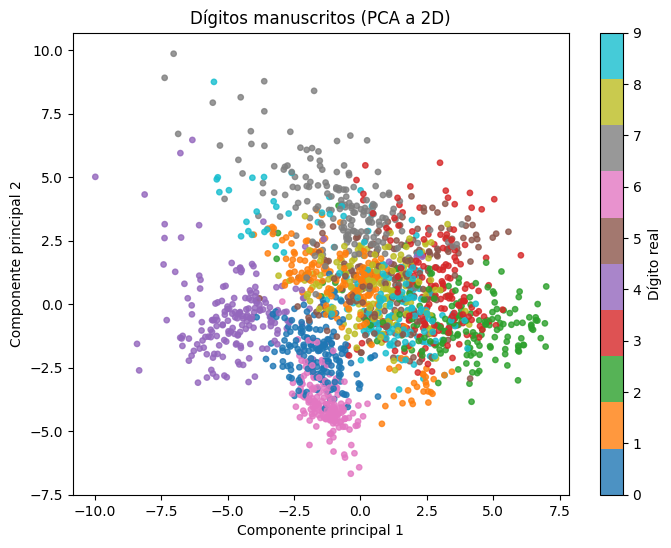

In [2]:
X = digits.data
y = digits.target

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Reducir a 2D con PCA (para visualizar todo el dataset)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap="tab10", s=15, alpha=0.8
)
plt.colorbar(scatter, ticks=range(10), label="Dígito real")
plt.title("Dígitos manuscritos (PCA a 2D)", fontsize=12)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

Ahora aplicamos t-SNE sobre 2D y visualizamos:

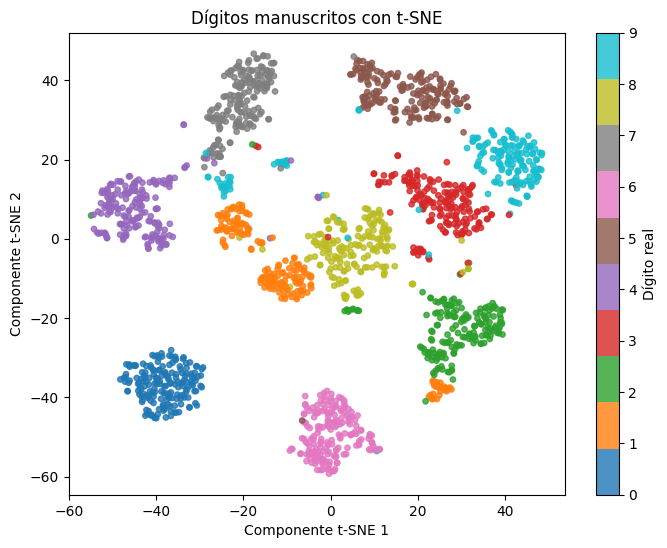

In [3]:
from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,
    random_state=42
)
X_embedded = tsne.fit_transform(X_scaled)

# Visualizar los resultados
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_embedded[:, 0], X_embedded[:, 1],
    c=y, cmap='tab10', s=15, alpha=0.8
)
plt.colorbar(scatter, ticks=range(10), label="Dígito real")
plt.title("Dígitos manuscritos con t-SNE", fontsize=12)
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()

Vemos que se agrupan mucho mejor:

- Los dígitos del mismo número se agrupan juntos (clusters bien definidos).
- Algunos grupos se solapan (por ejemplo, 3 y 8), porque tienen formas parecidas.

## Ventajas y limitaciones
### Ventajas
- Visualización clara: Es muy eficaz para revelar la estructura local y los grupos subyacentes en datos complejos y no lineales, lo que permite una visualización intuitiva.
- Preserva la estructura local: Mantiene las relaciones de cercanía entre puntos similares, lo que lo hace útil para identificar clústeres.
- Versatilidad: Se aplica en diversas áreas como el procesamiento de lenguaje natural (visualización de embeddings de palabras) y la bioinformática (análisis de expresión genética).
### Limitaciones
- Coste computacional elevado: Su complejidad cuadrática lo hace lento para grandes conjuntos de datos, aunque algunas implementaciones utilizan aproximaciones para mejorar el rendimiento.
- Interpretación de la estructura global: La distancia y el tamaño de los clústeres en el gráfico resultante no reflejan necesariamente su separación o tamaño real en el espacio original global. Su enfoque está en la estructura local.
- Sensibilidad a los hiperparámetros: Los resultados pueden variar significativamente según la elección de la "perplejidad" (que controla el equilibrio entre el enfoque local y global) y la tasa de aprendizaje.
- Naturaleza estocástica: Su aleatoriedad inicial puede producir resultados ligeramente diferentes en cada ejecución con los mismos parámetros.
### Cuándo usar t-SNE
- Visualización de conjuntos de alta dimensión: datos complejos (imágenes, embeddings de texto, etc.).
- Comprender la estructura local (vecinos cercanos), no la global. t-SNE muestra bien los clusters locales, pero no las distancias entre clusters.
- Cuando la relación entre variables es altamente no lineal.

    > **Regla práctica**: Usa t-SNE cuando tu objetivo sea ver cómo se agrupan los datos de alta dimensión, no cuando necesites usar esa proyección para tareas posteriores